<a href="https://colab.research.google.com/github/noahbean33/computational_finance_experiments/blob/main/time_series_smoothing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

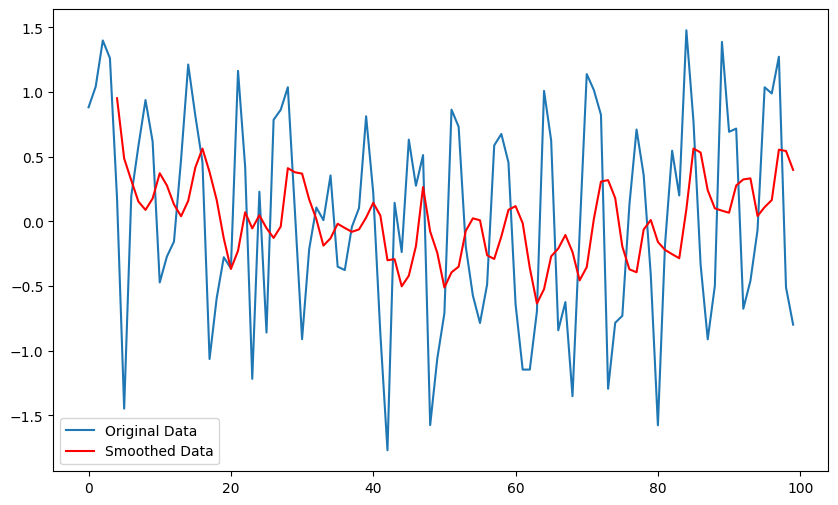

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generating some noisy time series data
np.random.seed(0)
time = np.arange(100)
data = np.sin(time) + np.random.normal(scale=0.5, size=time.shape)

# Creating a pandas DataFrame
df = pd.DataFrame({'time': time, 'data': data})

# Applying a simple moving average with a window size of 5
df['smoothed_data'] = df['data'].rolling(window=5).mean()

# Plotting the original and smoothed data
plt.figure(figsize=(10, 6))
plt.plot(df['time'], df['data'], label='Original Data')
plt.plot(df['time'], df['smoothed_data'], label='Smoothed Data', color='red')
plt.legend()
plt.show()


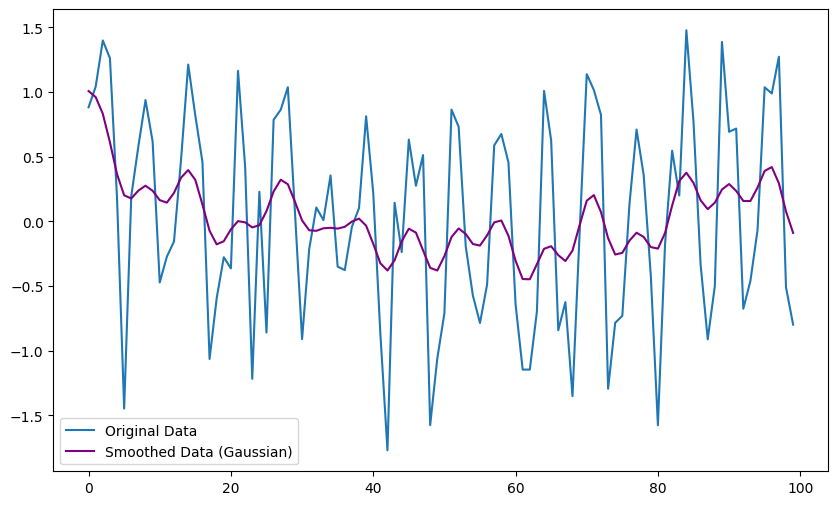

In [4]:
from scipy.ndimage import gaussian_filter1d

# Applying Gaussian filter
df['smoothed_data_gaussian'] = gaussian_filter1d(df['data'], sigma=2)

# Plotting the original and Gaussian smoothed data
plt.figure(figsize=(10, 6))
plt.plot(df['time'], df['data'], label='Original Data')
plt.plot(df['time'], df['smoothed_data_gaussian'], label='Smoothed Data (Gaussian)', color='purple')
plt.legend()
plt.show()


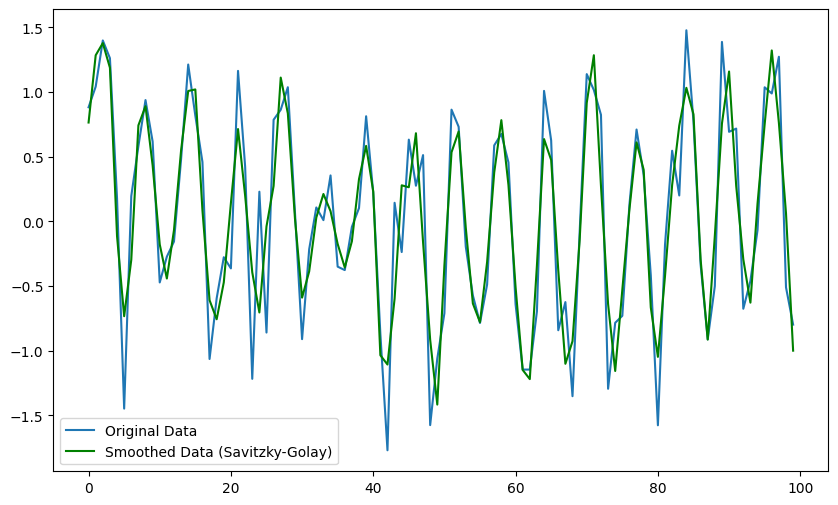

In [5]:
from scipy.signal import savgol_filter

# Applying the Savitzky-Golay filter
df['smoothed_data_sg'] = savgol_filter(df['data'], window_length=5, polyorder=2)

# Plotting the original and Savitzky-Golay smoothed data
plt.figure(figsize=(10, 6))
plt.plot(df['time'], df['data'], label='Original Data')
plt.plot(df['time'], df['smoothed_data_sg'], label='Smoothed Data (Savitzky-Golay)', color='green')
plt.legend()
plt.show()


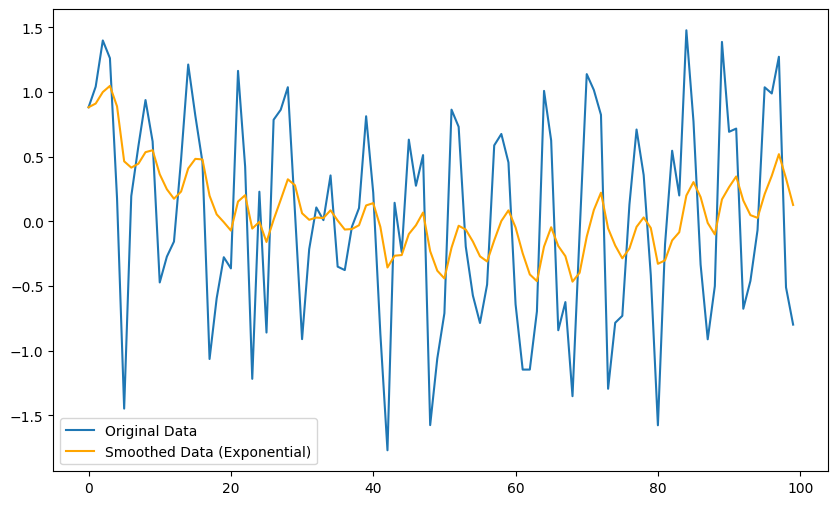

In [6]:
# Applying exponential smoothing
df['smoothed_data_exp'] = df['data'].ewm(span=10, adjust=False).mean()

# Plotting the original and exponentially smoothed data
plt.figure(figsize=(10, 6))
plt.plot(df['time'], df['data'], label='Original Data')
plt.plot(df['time'], df['smoothed_data_exp'], label='Smoothed Data (Exponential)', color='orange')
plt.legend()
plt.show()


In [9]:
!pip install pykalman


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.6/251.6 kB 3.6 MB/s eta 0:00:00


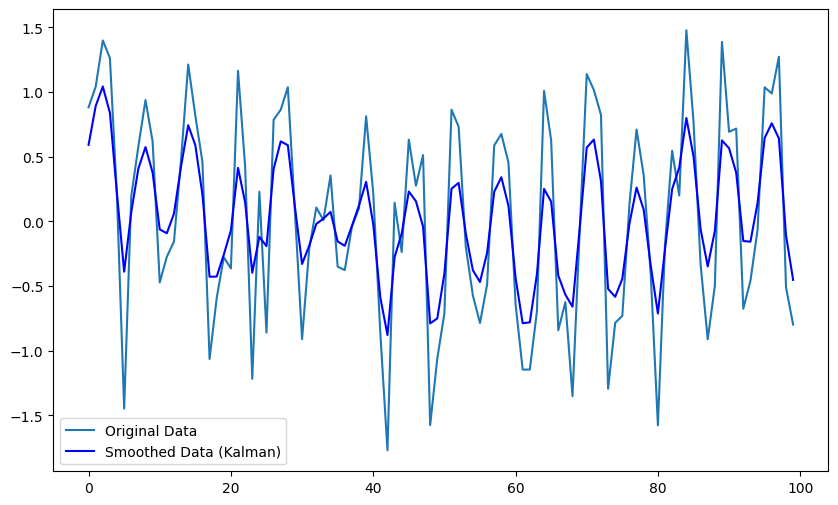

In [10]:
from pykalman import KalmanFilter

# Applying Kalman filter
kf = KalmanFilter(initial_state_mean=0, n_dim_obs=1)
state_means, _ = kf.smooth(df['data'].values)

df['smoothed_data_kalman'] = state_means

# Plotting the original and Kalman smoothed data
plt.figure(figsize=(10, 6))
plt.plot(df['time'], df['data'], label='Original Data')
plt.plot(df['time'], df['smoothed_data_kalman'], label='Smoothed Data (Kalman)', color='blue')
plt.legend()
plt.show()


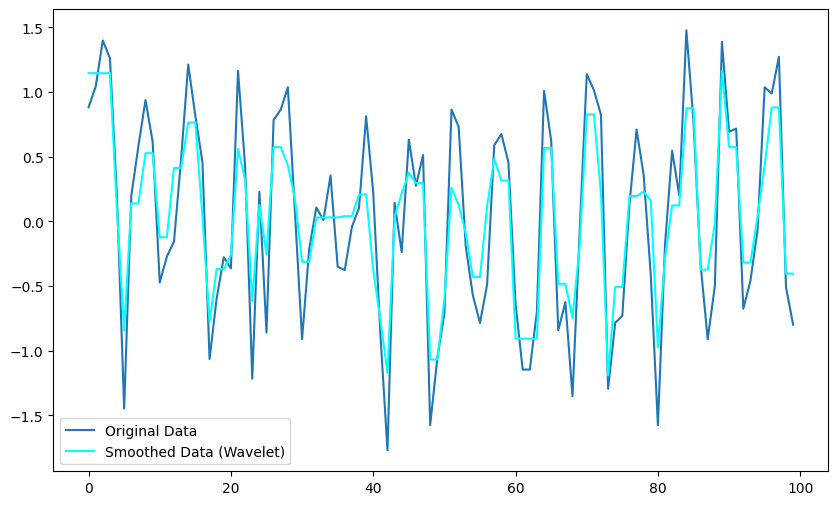

In [8]:
import pywt

# Applying wavelet transform for denoising
coeffs = pywt.wavedec(df['data'], 'db1', level=2)
coeffs[1:] = (pywt.threshold(i, value=0.5, mode='soft') for i in coeffs[1:])
df['smoothed_data_wavelet'] = pywt.waverec(coeffs, 'db1')

# Plotting the original and wavelet smoothed data
plt.figure(figsize=(10, 6))
plt.plot(df['time'], df['data'], label='Original Data')
plt.plot(df['time'], df['smoothed_data_wavelet'], label='Smoothed Data (Wavelet)', color='cyan')
plt.legend()
plt.show()
